# Machine Learning Homework 5
Kyle Lee 2018/12/10

## Part1 Getting Tf-idf

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = 10, 6
np.random.seed(7)

In [135]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words

In [136]:
test=pd.read_csv('Data/customer_sentiment.csv',header=None)

In [137]:
test.columns=["words","sentiment"]

In [138]:
test

,words,sentiment
0,Apple is an evil company.,0
1,Google is the best website ever.,1
2,I cannot live without Amazon.,1
3,Facebook has to stop existing.,0
4,I hate JPMorgan.,0
5,My favorite company is Bank of America.,1
6,I only shop at Wal-Mart because it’s so good.,1
7,Thank you Visa for existing.,1
8,Intel needs to be better.,0
9,Microsoft products are the worst.,0


In [139]:
corpus=np.array(test['words'])

In [140]:
v = TfidfVectorizer()

In [141]:
X = v.fit_transform(corpus)

In [143]:
v.get_feature_names()

['amazon',
 'america',
 'an',
 'apple',
 'are',
 'at',
 'bank',
 'be',
 'because',
 'best',
 'better',
 'cannot',
 'company',
 'ever',
 'evil',
 'existing',
 'facebook',
 'favorite',
 'for',
 'good',
 'google',
 'has',
 'hate',
 'intel',
 'is',
 'it',
 'jpmorgan',
 'live',
 'mart',
 'microsoft',
 'my',
 'needs',
 'of',
 'only',
 'products',
 'shop',
 'so',
 'stop',
 'thank',
 'the',
 'to',
 'visa',
 'wal',
 'website',
 'without',
 'worst',
 'you']

In [144]:
pd.DataFrame(data=X.toarray(), columns=v.get_feature_names())

,amazon,america,an,apple,are,at,bank,be,because,best,...,stop,thank,the,to,visa,wal,website,without,worst,you
0,0.0,0.000000,0.483606,0.483606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.435368,...,0.000000,0.000000,0.370102,0.000000,0.000000,0.000000,0.435368,0.0,0.000000,0.000000
2,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.474295,0.000000,0.000000,0.403194,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
5,0.0,0.399177,0.000000,0.000000,0.000000,0.000000,0.399177,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
6,0.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.000000,0.000000
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.460158,0.000000,0.000000,0.460158,0.000000,0.000000,0.0,0.000000,0.460158
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.460158,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.391176,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
9,0.0,0.000000,0.000000,0.000000,0.460158,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.391176,0.000000,0.000000,0.000000,0.000000,0.0,0.460158,0.000000


Co-ocurrence matrix

In [149]:
v2= CountVectorizer()

In [150]:
X2= v2.fit_transform(corpus).toarray()

In [151]:
n_d = X2.shape[0]

In [152]:
df = (X2>0).sum(axis=0)

In [153]:
idf=np.log( (n_d+1)/(df+1) )+1

In [154]:
idf==v.idf_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [155]:
tfidf_raw = X2*idf

In [156]:
tfidf_raw

array([[0.        , 0.        , 2.70474809, 2.70474809, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 2.29928298, 0.        , 2.70474809,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 2.01160091,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 2.70474809,
        0.        , 0.        , 0.        , 2.70474809, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        2.70474809, 0.        , 0.        , 0.        , 2.01160091,
        0.     

In [157]:
norm = np.sqrt(np.sum((tfidf_raw)**2, axis=1))

In [158]:
norm

array([5.59287289, 6.21255901, 5.40949618, 5.70266527, 3.82509143,
       6.77580635, 8.11424428, 5.87786962, 5.87786962, 5.87786962])

In [160]:
tfidf_raw/norm[:,None]

array([[0.        , 0.        , 0.48360622, 0.48360622, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.41110947, 0.        , 0.48360622,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.3596722 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.43536779,
        0.        , 0.        , 0.        , 0.43536779, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.43536779, 0.        , 0.        , 0.        , 0.32379586,
        0.     

In [161]:
X.toarray()

array([[0.        , 0.        , 0.48360622, 0.48360622, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.41110947, 0.        , 0.48360622,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.3596722 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.43536779,
        0.        , 0.        , 0.        , 0.43536779, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.43536779, 0.        , 0.        , 0.        , 0.32379586,
        0.     

# Part 2 Multinomial Naive Bayes
a. using sklearn to fit multinomial naive bayes model

In [164]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

In [165]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(test.words)
print(X_train.shape)

(10, 47)


In [166]:
X_test = vectorizer.transform([test.words[9]])
print(X_test.shape)

(1, 47)


In [167]:
Y=np.array(test.sentiment)
print(Y)

[0 1 1 0 0 1 1 1 0 0]


In [168]:
mnb = MultinomialNB()
history=mnb.fit(X_train, Y)
labels_1 = mnb.predict(X_test)

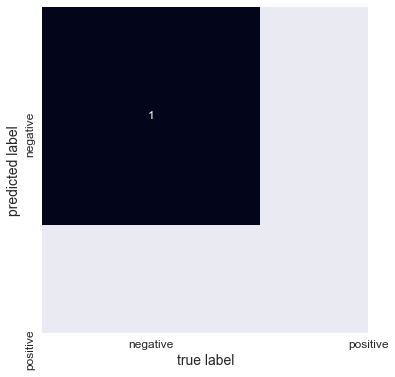

In [169]:
train_target_names=['negative','positive']
mat = confusion_matrix([test.sentiment[9]], labels_2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train_target_names, yticklabels=train_target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

b.Using equations to calculate log probabilities

In [171]:
temp=pd.DataFrame(data=X_train.toarray(), columns=vec.get_feature_names())
temp

,amazon,america,an,apple,are,at,bank,be,because,best,...,stop,thank,the,to,visa,wal,website,without,worst,you
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [172]:
num_of_bad=len(temp[test.sentiment==0])
num_of_good=len(temp[test.sentiment==1])
pc_good=num_of_good/(num_of_good+num_of_bad)
pc_bad=num_of_bad/(num_of_good+num_of_bad)
bad_logpc=np.log(pc_bad)
good_logpc=np.log(pc_good)
logpc=[bad_logpc,good_logpc]
print(logpc)


[-0.6931471805599453, -0.6931471805599453]


In [173]:
alpha=1
p=temp.shape[1]
bad=temp[test.sentiment==0] #bad
good=temp[test.sentiment==1] #good
bad_num=bad.sum(axis=0)+alpha
good_num=good.sum(axis=0)+alpha
bad_de=bad.values.sum()+alpha*p
good_de=good.values.sum()+alpha*p

In [174]:
bad_pxjc=bad_num/bad_de
good_pxjc=good_num/good_de
bad_logpxjc=np.log(bad_pxjc)
good_logpxjc=np.log(good_pxjc)

In [175]:
final=pd.DataFrame()
final['bad']=bad_logpxjc
final['good']=good_logpxjc
final

,bad,good
amazon,-4.234107,-3.663562
america,-4.234107,-3.663562
an,-3.540959,-4.356709
apple,-3.540959,-4.356709
are,-3.540959,-4.356709
at,-4.234107,-3.663562
bank,-4.234107,-3.663562
be,-3.540959,-4.356709
because,-4.234107,-3.663562
best,-4.234107,-3.663562


c. Compare sklearn output

In [176]:
final_mat=np.array(final)
final_mat2=np.transpose(final_mat)

In [178]:
#sklearn
history.feature_log_prob_

array([[-4.2341065 , -4.2341065 , -3.54095932, -3.54095932, -3.54095932,
        -4.2341065 , -4.2341065 , -3.54095932, -4.2341065 , -4.2341065 ,
        -3.54095932, -4.2341065 , -3.54095932, -4.2341065 , -3.54095932,
        -3.54095932, -3.54095932, -4.2341065 , -4.2341065 , -4.2341065 ,
        -4.2341065 , -3.54095932, -3.54095932, -3.54095932, -3.54095932,
        -4.2341065 , -3.54095932, -4.2341065 , -4.2341065 , -3.54095932,
        -4.2341065 , -3.54095932, -4.2341065 , -4.2341065 , -3.54095932,
        -4.2341065 , -4.2341065 , -3.54095932, -4.2341065 , -3.54095932,
        -3.13549422, -4.2341065 , -4.2341065 , -4.2341065 , -4.2341065 ,
        -3.54095932, -4.2341065 ],
       [-3.66356165, -3.66356165, -4.35670883, -4.35670883, -4.35670883,
        -3.66356165, -3.66356165, -4.35670883, -3.66356165, -3.66356165,
        -4.35670883, -3.66356165, -3.66356165, -3.66356165, -4.35670883,
        -3.66356165, -4.35670883, -3.66356165, -3.66356165, -3.66356165,
        -3.66356

In [177]:
final_mat2

array([[-4.2341065 , -4.2341065 , -3.54095932, -3.54095932, -3.54095932,
        -4.2341065 , -4.2341065 , -3.54095932, -4.2341065 , -4.2341065 ,
        -3.54095932, -4.2341065 , -3.54095932, -4.2341065 , -3.54095932,
        -3.54095932, -3.54095932, -4.2341065 , -4.2341065 , -4.2341065 ,
        -4.2341065 , -3.54095932, -3.54095932, -3.54095932, -3.54095932,
        -4.2341065 , -3.54095932, -4.2341065 , -4.2341065 , -3.54095932,
        -4.2341065 , -3.54095932, -4.2341065 , -4.2341065 , -3.54095932,
        -4.2341065 , -4.2341065 , -3.54095932, -4.2341065 , -3.54095932,
        -3.13549422, -4.2341065 , -4.2341065 , -4.2341065 , -4.2341065 ,
        -3.54095932, -4.2341065 ],
       [-3.66356165, -3.66356165, -4.35670883, -4.35670883, -4.35670883,
        -3.66356165, -3.66356165, -4.35670883, -3.66356165, -3.66356165,
        -4.35670883, -3.66356165, -3.66356165, -3.66356165, -4.35670883,
        -3.66356165, -4.35670883, -3.66356165, -3.66356165, -3.66356165,
        -3.66356

In [179]:
#sklearn
history.class_log_prior_

array([-0.69314718, -0.69314718])

In [130]:
np.transpose(logpc)

array([-0.69314718, -0.69314718])

d. predict last row

In [182]:
prob=mnb.predict_proba(X_train)
prob[-1]

array([0.96725147, 0.03274853])

In [183]:
logprob=mnb.predict_log_proba(X_train)
logprob[-1]

array([-0.03329677, -3.4188971 ])